In [1]:
from pathlib import Path
import numpy as np
import pandas as ps

import cv2
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

In [2]:
data_dir = Path("..") / "input"
train_dir = data_dir / "train"
data_dir

PosixPath('../input')

In [3]:
train = ps.read_csv(data_dir / "train.csv")
print(train.shape)
train.head()

(1580470, 2)


,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7


In [4]:
train["landmark_id"].min(), train["landmark_id"].max()

(1, 203092)

In [5]:
train["landmark_id"].nunique()

81313

In [6]:
train["landmark_id"].value_counts().min(), train["landmark_id"].value_counts().max()

(2, 6272)

In [7]:
counts = train["landmark_id"].value_counts()
# counts = counts[counts >= 4]

In [8]:
counts.index.min(), counts.index.max()

(1, 203092)

Text(0.5, 1.0, 'classes counts (distribution)')

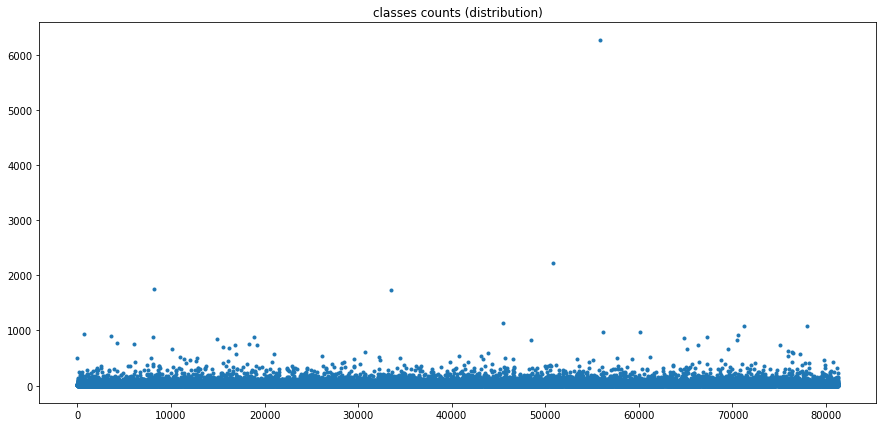

In [9]:
plt.figure(figsize=(15, 7))
plt.plot(np.arange(len(counts)), counts.sort_index(), ".")
plt.title("classes counts (distribution)")

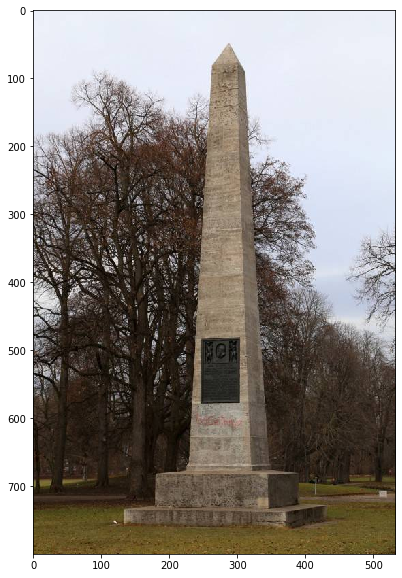

In [10]:
img = cv2.imread(str(train_dir / "1"/ "7" / "6" / "17660ef415d37059.jpg"))[:,:,::-1]

plt.figure(figsize=(10, 10))
plt.imshow(img)

In [11]:
counts[counts > 3].shape

(72322,)

In [12]:
landmarks_for_validation = counts[counts > 3].index

len(landmarks_for_validation)

72322

In [13]:
import random

random.seed(2020)

In [14]:
def sample_image(df):
    group = df["landmark_id"].values[0]
    if group not in landmarks_for_validation:
        id_ = None
    else:
        id_ = random.choice(df["id"].values)
    return ps.Series([id_, group], ["id", "landmark_id"])

In [15]:
validation = train.groupby("landmark_id").agg(sample_image).reset_index().dropna()

print(validation.shape)
validation.head()

(72322, 2)


,landmark_id,id
0,1,92b6290d571448f6
1,7,c87bbcbf35a41875
2,9,e75cc529d7dc7506
3,11,c8a0eef7862fbdb9
4,12,6aed1ad6270932e7


In [16]:
train["is_valid"] = False
train.at[train["id"].isin(validation["id"]), "is_valid"] = True

print(train.shape)
print(train["is_valid"].value_counts())
train.head()

(1580470, 3)
False    1508148
True       72322
Name: is_valid, dtype: int64


,id,landmark_id,is_valid
0,17660ef415d37059,1,False
1,92b6290d571448f6,1,True
2,cd41bf948edc0340,1,False
3,fb09f1e98c6d2f70,1,False
4,25c9dfc7ea69838d,7,False


In [17]:
train.to_pickle(data_dir / "train_valid.pkl")